<a href="https://colab.research.google.com/github/StivenVelasquez/Proyecto-Final-TS3/blob/main/Proyecto_Aplicaci%C3%B3n_Real_Modelo_de_Pattern_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><strong><em>PROYECTO FINAL: APLICACIÓN REAL DEL MODELO DE PATTERN RECOGNITION</center>

<div align="justify">
Integrantes:

<div align="justify"></em></strong></div>
Stiven Velásquez López
<div align="justify">
Yeiner Pájaro Otero

<div align="justify"><strong><em>Idea Inicial</em></strong></div>
<div align="justify">Trabajar un dataset que nos permita clasificar o predecir dentro de un conjunto de datos de tumores si hay o no resultados cancerígenos. 
Consideramos que esta es una idea valiosa y relevante en el campo de la salud y la medicina. Este tipo de análisis de datos tiene el potencial de ayudar en la detección temprana y el diagnóstico preciso del cáncer, lo que puede tener un impacto significativo en la salud y el bienestar de las personas.</div> 


In [ ]:
import pandas as pd                      # Importa la biblioteca Pandas para el análisis y manipulación de datos.
import seaborn as sns                    # Importa la biblioteca Seaborn para la visualización de datos.
from sklearn.decomposition import PCA    # Importa el módulo PCA de scikit-learn para realizar análisis de componentes principales.
from sklearn.preprocessing import StandardScaler  # Importa el módulo StandardScaler de scikit-learn para estandarizar los datos.
from sklearn.model_selection import train_test_split  # Importa la función train_test_split de scikit-learn para dividir los datos en conjuntos de entrenamiento y prueba.
from sklearn.linear_model import LogisticRegression  # Importa el modelo de regresión logística de scikit-learn para problemas de clasificación.
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay ,  f1_score# Importa varias métricas y visualizaciones de matriz de confusión para evaluar el rendimiento del modelo.
import matplotlib.pyplot as plt         # Importa la biblioteca Matplotlib para la visualización de gráficos.
from ipywidgets import interact         # Importa el módulo interact de ipywidgets para crear widgets interactivos.
from sklearn.naive_bayes import GaussianNB  # Importa el modelo de Naive Bayes de scikit-learn para problemas de clasificación.
from sklearn.svm import SVC              # Importa el modelo de SVM de scikit-learn para problemas de clasificación.
from sklearn.tree import DecisionTreeClassifier  # Importa el modelo de árbol de decisión de scikit-learn para problemas de clasificación.
from sklearn.ensemble import RandomForestClassifier  # Importa el modelo de bosque aleatorio de scikit-learn para problemas de clasificación.
from sklearn.metrics import classification_report # Importa la función classification_report de scikit-learn para generar un informe de clasificación.
from sklearn.model_selection import cross_val_score # Importa la función cross_val_score de scikit-learn para realizar validación cruzada.


<div align="justify"><strong><em>Descripción del dataset: Cancer data
</em></strong></div>
<div align="justify">El conjunto de datos "load_breast_cancer" de scikit-learn es una base de datos muy conocida y utilizada para problemas de clasificación de cáncer de mama. Proporciona información sobre características clínicas derivadas de imágenes digitalizadas de tejido mamario y se utiliza comúnmente para predecir si un tumor es maligno (cáncer de mama) o benigno (no canceroso).

<div align="justify">El conjunto de datos contiene un total de 569 instancias (muestras) y 30 características diferentes. Estas características describen varios aspectos de los núcleos celulares presentes en las imágenes, como el tamaño, la forma y la textura.

<div align="justify">La variable objetivo (target) en este conjunto de datos es una columna binaria que indica si una muestra corresponde a un tumor maligno (cáncer de mama) o benigno. Un valor de 0 representa un tumor benigno y un valor de 1 representa un tumor maligno.

<div align="justify">El conjunto de datos "load_breast_cancer" se utiliza comúnmente para entrenar modelos de aprendizaje automático de clasificación en problemas de detección de cáncer de mama. Al utilizar este conjunto de datos, se puede explorar la relación entre las características clínicas y la naturaleza maligna o benigna de los tumores, y desarrollar modelos predictivos para la clasificación precisa de futuros casos.

<div align="justify">Es importante tener en cuenta que cada columna de características en el conjunto de datos tiene un significado específico y puede ser utilizado para extraer información relevante sobre las características del tejido mamario.
</div> 


In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd  # for csv files and dataframe

# Load the breast cancer dataset
data = load_breast_cancer()

# Extract the features (X) and the target variable (y)
X = data.data
y = data.target

# Print the shape of the dataset
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Print the feature names
print("Feature names:", data.feature_names)

# Print the class labels
print("Class labels:", data.target_names)

Shape of X: (569, 30)
Shape of y: (569,)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Class labels: ['malignant' 'benign']


In [ ]:
# Crear un DataFrame de Pandas con los datos y las características
df = pd.DataFrame(data.data, columns=data.feature_names)

# Agregar la columna de la variable objetivo al DataFrame
df['target'] = data.target

# Mostrar una vista previa de las primeras filas del DataFrame
df.head(30)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,0


In [ ]:
# sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
#                                      'mean smoothness', 'mean compactness', 'mean concavity',
#                                      'mean concave points', 'mean symmetry', 'mean fractal dimension'])

# # Guardar la gráfica en formato de imagen
# plt.savefig('pairplot.png')

<div align="justify"><strong><em>Observaciones</em></strong></div>
<div align="justify">El gráfico de pares es útil para visualizar la relación entre diferentes características y cómo se relacionan con la variable de destino. Permite identificar patrones, correlaciones y posibles separaciones entre las clases. A continuación se presentan algunos patrones relevantes:
</div> 

<div align="justify">1. El mean radius: El "mean radius" es una medida de tamaño de los núcleos celulares presentes en las imágenes digitalizadas del tejido mamario. En el gráfico se observa la  tendencia de que los tumores malignos tiendan a tener un "mean radius" más alto en comparación con los tumores benignos.
</div> 
<div align="justify">2. El mean perimeter: El "mean perimeter" es una medida de la longitud total del contorno de los núcleos celulares. Esta característica puede proporcionar información sobre la forma y la irregularidad de los núcleos celulares presentes en las muestras de tejido mamario.Al analizar esta característica en relación con la variable de destino (cáncer de mama maligno o benigno), se pueden obtener conclusiones sobre cómo la forma y la irregularidad del contorno de los núcleos celulares pueden estar relacionadas con la naturaleza maligna o benigna de los tumores. Por ejemplo, tumores malignos tienen tendencia a perímetros promedio más altos debido a su forma irregular y esto se observa en el gráfico.
</div> 
<div align="justify">3.  El mean area: El "mean area" es una medida del tamaño promedio de los núcleos celulares. Esta característica puede proporcionar información sobre el tamaño general de los núcleos y puede ser relevante para el análisis de imágenes en la detección de cáncer de mama.En el contexto del conjunto de datos, el valor del "mean area" puede variar entre las diferentes muestras. Un valor más alto indica un área más grande y, por lo tanto, núcleos celulares más grandes, mientras que un valor más bajo indica un área más pequeña y núcleos celulares más pequeños. Y así,  los tumores malignos tiendan a tener un "mean area" más alto en comparación con los tumores benignos.
</div> 
<div align="justify">4. El mean compactness: La compacidad es una medida que relaciona el perímetro de un objeto con su área. En este caso, la "mean compactness" se calcula como el perímetro al cuadrado dividido por el área real de los núcleos celulares.
Una compacidad más alta indica que los núcleos celulares tienen una forma más irregular o con bordes más rugosos en relación con su tamaño, mientras que una compacidad más baja indica que los núcleos tienen una forma más regular y suaves bordes. Y así, tumores malignos presentan una compacidad promedio más alta debido a su forma más irregular.
</div> 
<div align="justify">
5. Mean concavity: La concavidad se refiere a la cantidad de depresiones o concavidades presentes en el contorno de un núcleo celular. La "mean concavity" se calcula como el promedio de estas concavidades en los núcleos celulares de una muestra.Un valor más alto de "mean concavity" indica que los núcleos celulares tienen más concavidades o depresiones en su contorno, mientras que un valor más bajo indica que los núcleos tienen contornos más lisos y menos concavidades. Tumores malignos presentan una tendencia a tener una mayor concavidad promedio debido a su forma más irregular y presencia de concavidades.
</div> 
<div align="justify">
6. Mean concave points: Los puntos cóncavos son aquellos ubicados en las regiones de concavidad en el contorno de un núcleo celular. La característica "mean concave points" se refiere al promedio de la cantidad de estos puntos en los núcleos celulares de una muestra.Un valor más alto de "mean concave points" indica que los núcleos celulares tienen más puntos cóncavos en su contorno, mientras que un valor más bajo indica que los núcleos tienen menos puntos cóncavos.Tumores malignos tienen una mayor cantidad de puntos cóncavos promedio debido a su forma más irregular y mayor presencia de concavidades.
</div> 
<div align="justify">
7. El gráfico de dispersión muestra una separación clara entre los valores de "mean radius" (radio promedio) y las demás características, esto indica que estas características pueden ser útiles para distinguir entre tumores benignos y malignos en el conjunto de datos.La separación observada en el gráfico de dispersión sugiere que los valores de "mean radius" tienen una relación discriminativa con respecto al diagnóstico de cáncer de mama. Puede haber una tendencia de que los tumores malignos tengan valores más altos de "mean radius" en comparación con los tumores benignos, lo que permite una separación efectiva entre las clases.Esta separación puede ser una indicación de la capacidad predictiva de "mean radius" para identificar la naturaleza maligna o benigna de los tumores. Al utilizar esta característica como entrada en un modelo de aprendizaje automático, es posible que se logre una buena precisión en la clasificación de los casos futuros.
</div> 
<div align="justify">
8. También se observa una separación clara en el gráfico de dispersión entre "mean perimeter" (perímetro promedio) y las demás características, esto refuerza la idea de que estas características pueden ser útiles para distinguir entre tumores benignos y malignos en el conjunto de datos.La separación en el gráfico de dispersión entre "mean perimeter" y las demás características indica que el valor del "mean perimeter" puede tener una relación discriminativa con respecto al diagnóstico de cáncer de mama. Es posible que los tumores malignos presenten un "mean perimeter" más alto en comparación con los tumores benignos, lo que permite una separación clara entre las clases.Esta observación es relevante para el análisis y la clasificación de tumores mamarios, ya que el "mean perimeter" puede ser un indicador importante de la forma y el tamaño de los núcleos celulares, lo cual está relacionado con la naturaleza maligna o benigna de los tumores.Al utilizar "mean perimeter" junto con otras características como entrada en un modelo de aprendizaje automático, es posible obtener un alto grado de precisión en la clasificación de los casos futuros.
</div> 
<div align="justify">
9.Además se observa una separación clara en el gráfico de dispersión entre "mean area" (área promedio) y las demás características, esto refuerza aún más la idea de que estas características pueden ser útiles para distinguir entre tumores benignos y malignos en el conjunto de datos.La separación en el gráfico de dispersión entre "mean area" y las demás características indica que el valor del "mean area" puede tener una relación discriminativa con respecto al diagnóstico de cáncer de mama. Es posible que los tumores malignos presenten un "mean area" más alto en comparación con los tumores benignos, lo que permite una separación clara entre las clases.El "mean area" es una medida del tamaño promedio de los núcleos celulares y puede ser un indicador importante de la proliferación celular y el crecimiento tumoral. Esta característica puede proporcionar información relevante para la clasificación y el diagnóstico del cáncer de mama.Al utilizar "mean area" junto con otras características en un modelo de aprendizaje automático, es posible lograr una alta precisión en la clasificación de los casos futuros y en la identificación de tumores malignos y benignos.
</div> 

1    357
0    212
Name: target, dtype: int64


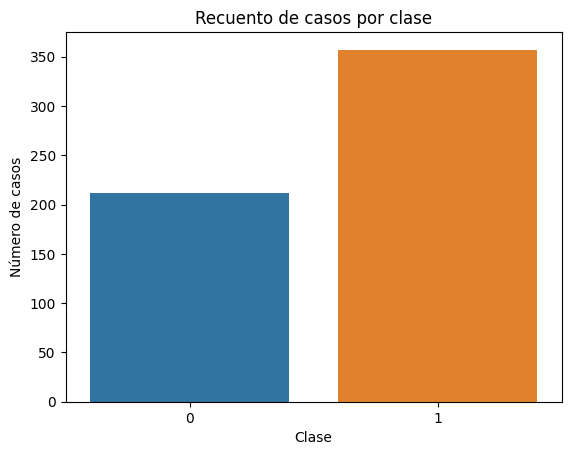

In [ ]:
import seaborn as sns

# Graficar el recuento de casos por clase
sns.countplot(x=df['target'])
plt.xlabel('Clase')
plt.ylabel('Número de casos')
plt.title('Recuento de casos por clase')

# Obtener el recuento de casos por clase
counts = df['target'].value_counts()
print(counts)


<div align="justify"><strong><em>Observaciones</em></strong></div>
<div align="justify">El gráfico de barras generado  muestra 212 casos benignos y 357 casos malignos, podemos decir que hay una diferencia en el número de casos entre las dos categorías.Esta proporción indica que los casos malignos son más frecuentes en el conjunto de datos de cáncer de mama que los casos benignos.Es importante tener en cuenta esta diferencia en el recuento de casos al realizar análisis y modelado. El desequilibrio en la proporción de clases puede afectar el rendimiento de los algoritmos de aprendizaje automático, especialmente si no se aborda adecuadamente.Cuando hay un desequilibrio en el conjunto de datos, es posible que se requieran técnicas de manejo de desequilibrio de clase, o el uso de algoritmos de aprendizaje automático que sean robustos ante desequilibrios de clase.
</div> 

In [ ]:
# Selecciona todas las filas y todas las columnas excepto la última (que contiene las etiquetas) del DataFrame 'df'
# y se guarda como una matriz NumPy llamada 'X'
X = df.iloc[:, :-1].values
# Selecciona la columna 'target' del DataFrame 'df' y se guarda como una matriz NumPy llamada 'y'
y = df['target'].values

<div align="justify"><strong><em>Objetivo del Proyecto</em></strong></div>
<div align="justify">El objetivo principal es desarrollar  un modelo de machine learning basado en Logistic Regression, Gaussian Naive Bayes, Support Vector Machine (SVM), Random Forest y Decision Tree que sea capaz de predecir si se está en presencia de cáncer o no. Algunos de los pasos a tener en cuenta:
</div> 

<div align="justify">* Obtener y preparar el conjunto de datos.
</div> 
<div align="justify">* Dividir el conjunto de datos.
</div> 
<div align="justify">* Aplicar PCA..
</div> 
<div align="justify">* Entrenar los modelos.
</div> 
<div align="justify">* Evaluar los modelos.
</div> 
<div align="justify">* Realizar predicciones.
</div> 
<div align="justify">* Realizar predicciones con los conjuntos que no están en el entrenamiento. 
</div> 
<div align="justify">* Optimización y mejora.
</div> 

In [ ]:
def evaluar_modelos(X, y,metric_type='accuracy_score'):
    # Normalizar los datos
    scaler = StandardScaler()
    X_norm = scaler.fit_transform(X)

    # Proyectar los datos en el espacio latente de diferentes dimensiones
    q_values = [2, 5, 10, 15, 20, 25, 30]

    for i, q in enumerate(q_values):
        # Proyectar los datos en el espacio latente
        pca = PCA(n_components=q)
        Z = pca.fit_transform(X_norm)

        # Dividir los datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=42)

        # Entrenar el modelo de regresión logística
        lr = LogisticRegression()
        lr.fit(X_train, y_train)

        # Entrenar el modelo de clasificación Bayesiano
        gnb = GaussianNB()
        gnb.fit(X_train, y_train)

        # Entrenar el modelo de SVM
        svm = SVC()
        svm.fit(X_train, y_train)

        # Entrenar el modelo de arbol de decisión
        dt = DecisionTreeClassifier()
        dt.fit(X_train, y_train)

        # Entrenar el modelo de RandomForest
        rf = RandomForestClassifier()
        rf.fit(X_train, y_train)

        # Predecir las etiquetas en el conjunto de prueba
        y_pred_gnb = gnb.predict(X_test)
        y_pred_lr = lr.predict(X_test)
        y_pred_svm = svm.predict(X_test)
        y_pred_rf = rf.predict(X_test)
        y_pred_dt = dt.predict(X_test)

        # Evaluar el desempeño de los modelos
        if metric_type == 'accuracy_score':
          metric_title = 'Accuracy'
          acc_gnb = accuracy_score(y_test, y_pred_gnb)
          acc_lr = accuracy_score(y_test, y_pred_lr)
          acc_svm = accuracy_score(y_test, y_pred_svm)
          acc_dt = accuracy_score(y_test, y_pred_dt)
          acc_rf = accuracy_score(y_test, y_pred_rf)        

          print('Accuracy del modelo de clasificación Bayesiano con %d componentes: %.3f' % (q, acc_gnb))
          print('Accuracy del modelo de regresión logística con %d componentes: %.3f' % (q, acc_lr))
          print('Accuracy del modelo de Support Vector Machine (SVM) con %d componentes: %.3f' % (q, acc_svm))
          print('Accuracy del modelo de Arbol de Decisión con %d componentes: %.3f' % (q, acc_dt))
          print('Accuracy del modelo de Random Forest con %d componentes: %.3f' % (q, acc_rf))
          print()
        elif metric_type =='f1_score':
          metric_title = 'F1-Score'
          f1_score_gnb = f1_score(y_test, y_pred_gnb)
          f1_score_lr = f1_score(y_test, y_pred_lr)
          f1_score_svm = f1_score(y_test, y_pred_svm)
          f1_score_dt = f1_score(y_test, y_pred_dt)
          f1_score_rf = f1_score(y_test, y_pred_rf)

          print('F1-Score del modelo de clasificación Bayesiano con %d componentes: %.3f' % (q, f1_score_gnb))
          print('F1-Score del modelo de regresión logística con %d componentes: %.3f' % (q, f1_score_lr))
          print('F1-Score del modelo de Support Vector Machine (SVM) con %d componentes: %.3f' % (q, f1_score_svm))
          print('F1-Score del modelo de Arbol de Decisión con %d componentes: %.3f' % (q, f1_score_dt))
          print('F1-Score del modelo de Random Forest con %d componentes: %.3f' % (q, f1_score_rf))
          print()
        elif metric_type == 'cross-validation':
          metric_title = 'Cross-Validation'          
          gnb_scores = cross_val_score(gnb, Z, y, cv=5) 
          lr_scores = cross_val_score(lr, Z, y, cv=5)
          svm_scores = cross_val_score(svm, Z, y, cv=5)
          dt_scores = cross_val_score(dt, Z, y, cv=5)
          rf_scores = cross_val_score(rf, Z, y, cv=5)
         

          # Print the cross-validation scores
          for j in range(5):
            print('Cross-validation scores for Gaussian Naive Bayes with %d components (CV %d): %.3f' %(q,j+1, gnb_scores[j]))          
            print('Cross-validation scores for Logistic Regression with %d components (CV %d): %.3f' %(q,j+1, lr_scores[j]))
            print('Cross-validation scores for Support Vector Machine (SVM)  with %d components (CV %d): %.3f' %(q,j+1,svm_scores[j]))
            print('Cross-validation scores for Decision Tree with %d components (CV %d): %3.f' %(q,j+1, dt_scores[j]))
            print('Cross-validation scores for Random Forest with %d components (CV %d): %3.f'%(q,j+1, rf_scores[j]))
          print()

        else:
          print("Tipo de métrica no válido. Por favor, elija 'accuracy_score' o 'f1_score'.")


In [ ]:
evaluar_modelos(X, y,'accuracy_score')

Accuracy del modelo de clasificación Bayesiano con 2 componentes: 0.918
Accuracy del modelo de regresión logística con 2 componentes: 0.971
Accuracy del modelo de Support Vector Machine (SVM) con 2 componentes: 0.936
Accuracy del modelo de Arbol de Decisión con 2 componentes: 0.912
Accuracy del modelo de Random Forest con 2 componentes: 0.953

Accuracy del modelo de clasificación Bayesiano con 5 componentes: 0.930
Accuracy del modelo de regresión logística con 5 componentes: 0.988
Accuracy del modelo de Support Vector Machine (SVM) con 5 componentes: 0.971
Accuracy del modelo de Arbol de Decisión con 5 componentes: 0.953
Accuracy del modelo de Random Forest con 5 componentes: 0.971

Accuracy del modelo de clasificación Bayesiano con 10 componentes: 0.912
Accuracy del modelo de regresión logística con 10 componentes: 0.982
Accuracy del modelo de Support Vector Machine (SVM) con 10 componentes: 0.965
Accuracy del modelo de Arbol de Decisión con 10 componentes: 0.936
Accuracy del modelo d

<div align="justify"><strong><em>Observaciones</em></strong></div>
<div align="justify">Al analizar los resultados de los modelos de clasificación en función de su precisión (accuracy), podemos realizar las siguientes argumentaciones para seleccionar los mejores modelos:
</div> 
<div align="justify">1. Modelo de regresión logística: El modelo de regresión logística muestra un rendimiento sobresaliente en la mayoría de las configuraciones, con una precisión superior al 98% en todos los casos, exceptuando cuando se trabaja con 2 componentes que da un accuracy de 97,1%. Esto indica que es un modelo altamente confiable y preciso en la clasificación de los datos. Además, su precisión se mantiene alta en diferentes números de componentes, lo que demuestra su robustez.
</div> 
<div align="justify">2. Modelo de Support Vector Machine (SVM): El modelo de SVM muestra un buen rendimiento con una precisión que varía entre el 93,6% y el 97,7% en diferentes configuraciones.Esto sugiere que el modelo tiene una capacidad excepcional para clasificar los datos correctamente. Además, su precisión se mantiene constante en diferentes números de componentes, lo que indica que es un modelo estable y confiable.
</div>
<div align="justify">3. Modelo de Random Forest: El modelo de Random Forest también presenta una precisión alta en la mayoría de las configuraciones. Su precisión oscila entre el 93% y el 97,1% en diferentes configuraciones. Aunque su precisión es ligeramente inferior a los modelos de regresión logística y SVM, sigue siendo un modelo confiable para la clasificación. Además, su rendimiento se mantiene consistente en diferentes números de componentes
</div>  
<div align="justify">
4. Modelo de Árbol de Decisión: El modelo de Árbol de Decisión presenta una precisión competitiva, pero ligeramente inferior en comparación con los modelos anteriores. Su precisión oscila entre el 92,4% y el 97,1 en diferentes configuraciones. Aunque muestra un rendimiento sólido, su precisión es superada por el modelo de regresión logística.
</div> 
<div align="justify">5. Modelo de clasificación Bayesiano: El modelo de clasificación Bayesiano muestra una precisión que varía entre el 83,6% y el 93% en diferentes configuraciones. Aunque su precisión es inferior a los otros modelos mencionados, sigue siendo un modelo válido para la clasificación. Sin embargo, en general, los otros modelos superan su desempeño en términos de precisión.
</div> 
<div align="justify">
En conclusión, los mejores modelos de clasificación basados en los resultados de precisión son el modelo de regresión logística, el modelo de Support Vector Machine (SVM), el modelo de Árbol de Decisión, y el modelo de Random Forest ya que muestran una alta precisión en todas las configuraciones. Estos modelos son recomendados para aplicaciones donde se requiera una alta precisión en la clasificación de datos. 
</div> 

In [ ]:
#Métricas de los modelos teniendo en cuenta el número de componentes utilizados
def metricas(cm):
    # Extraer los valores de la matriz de confusión
    vn, fp, fn, vp = cm.ravel()

    # Calcular las métricas
    sensibilidad = vp / (vp + fn)
    especificidad = vn / (vn + fp)
    valor_predictivo_negativo = vn / (vn + fn)
    valor_predictivo_positivo = vp / (vp + fp)

    # Imprimir los resultados
    print("Sensibilidad:", sensibilidad)
    print("Especificidad:", especificidad)
    print("Valor Predictivo Negativo:", valor_predictivo_negativo)
    print("Valor Predictivo Positivo:", valor_predictivo_positivo)

##Matrices de confusión para los 4 módelos con mayor precisión

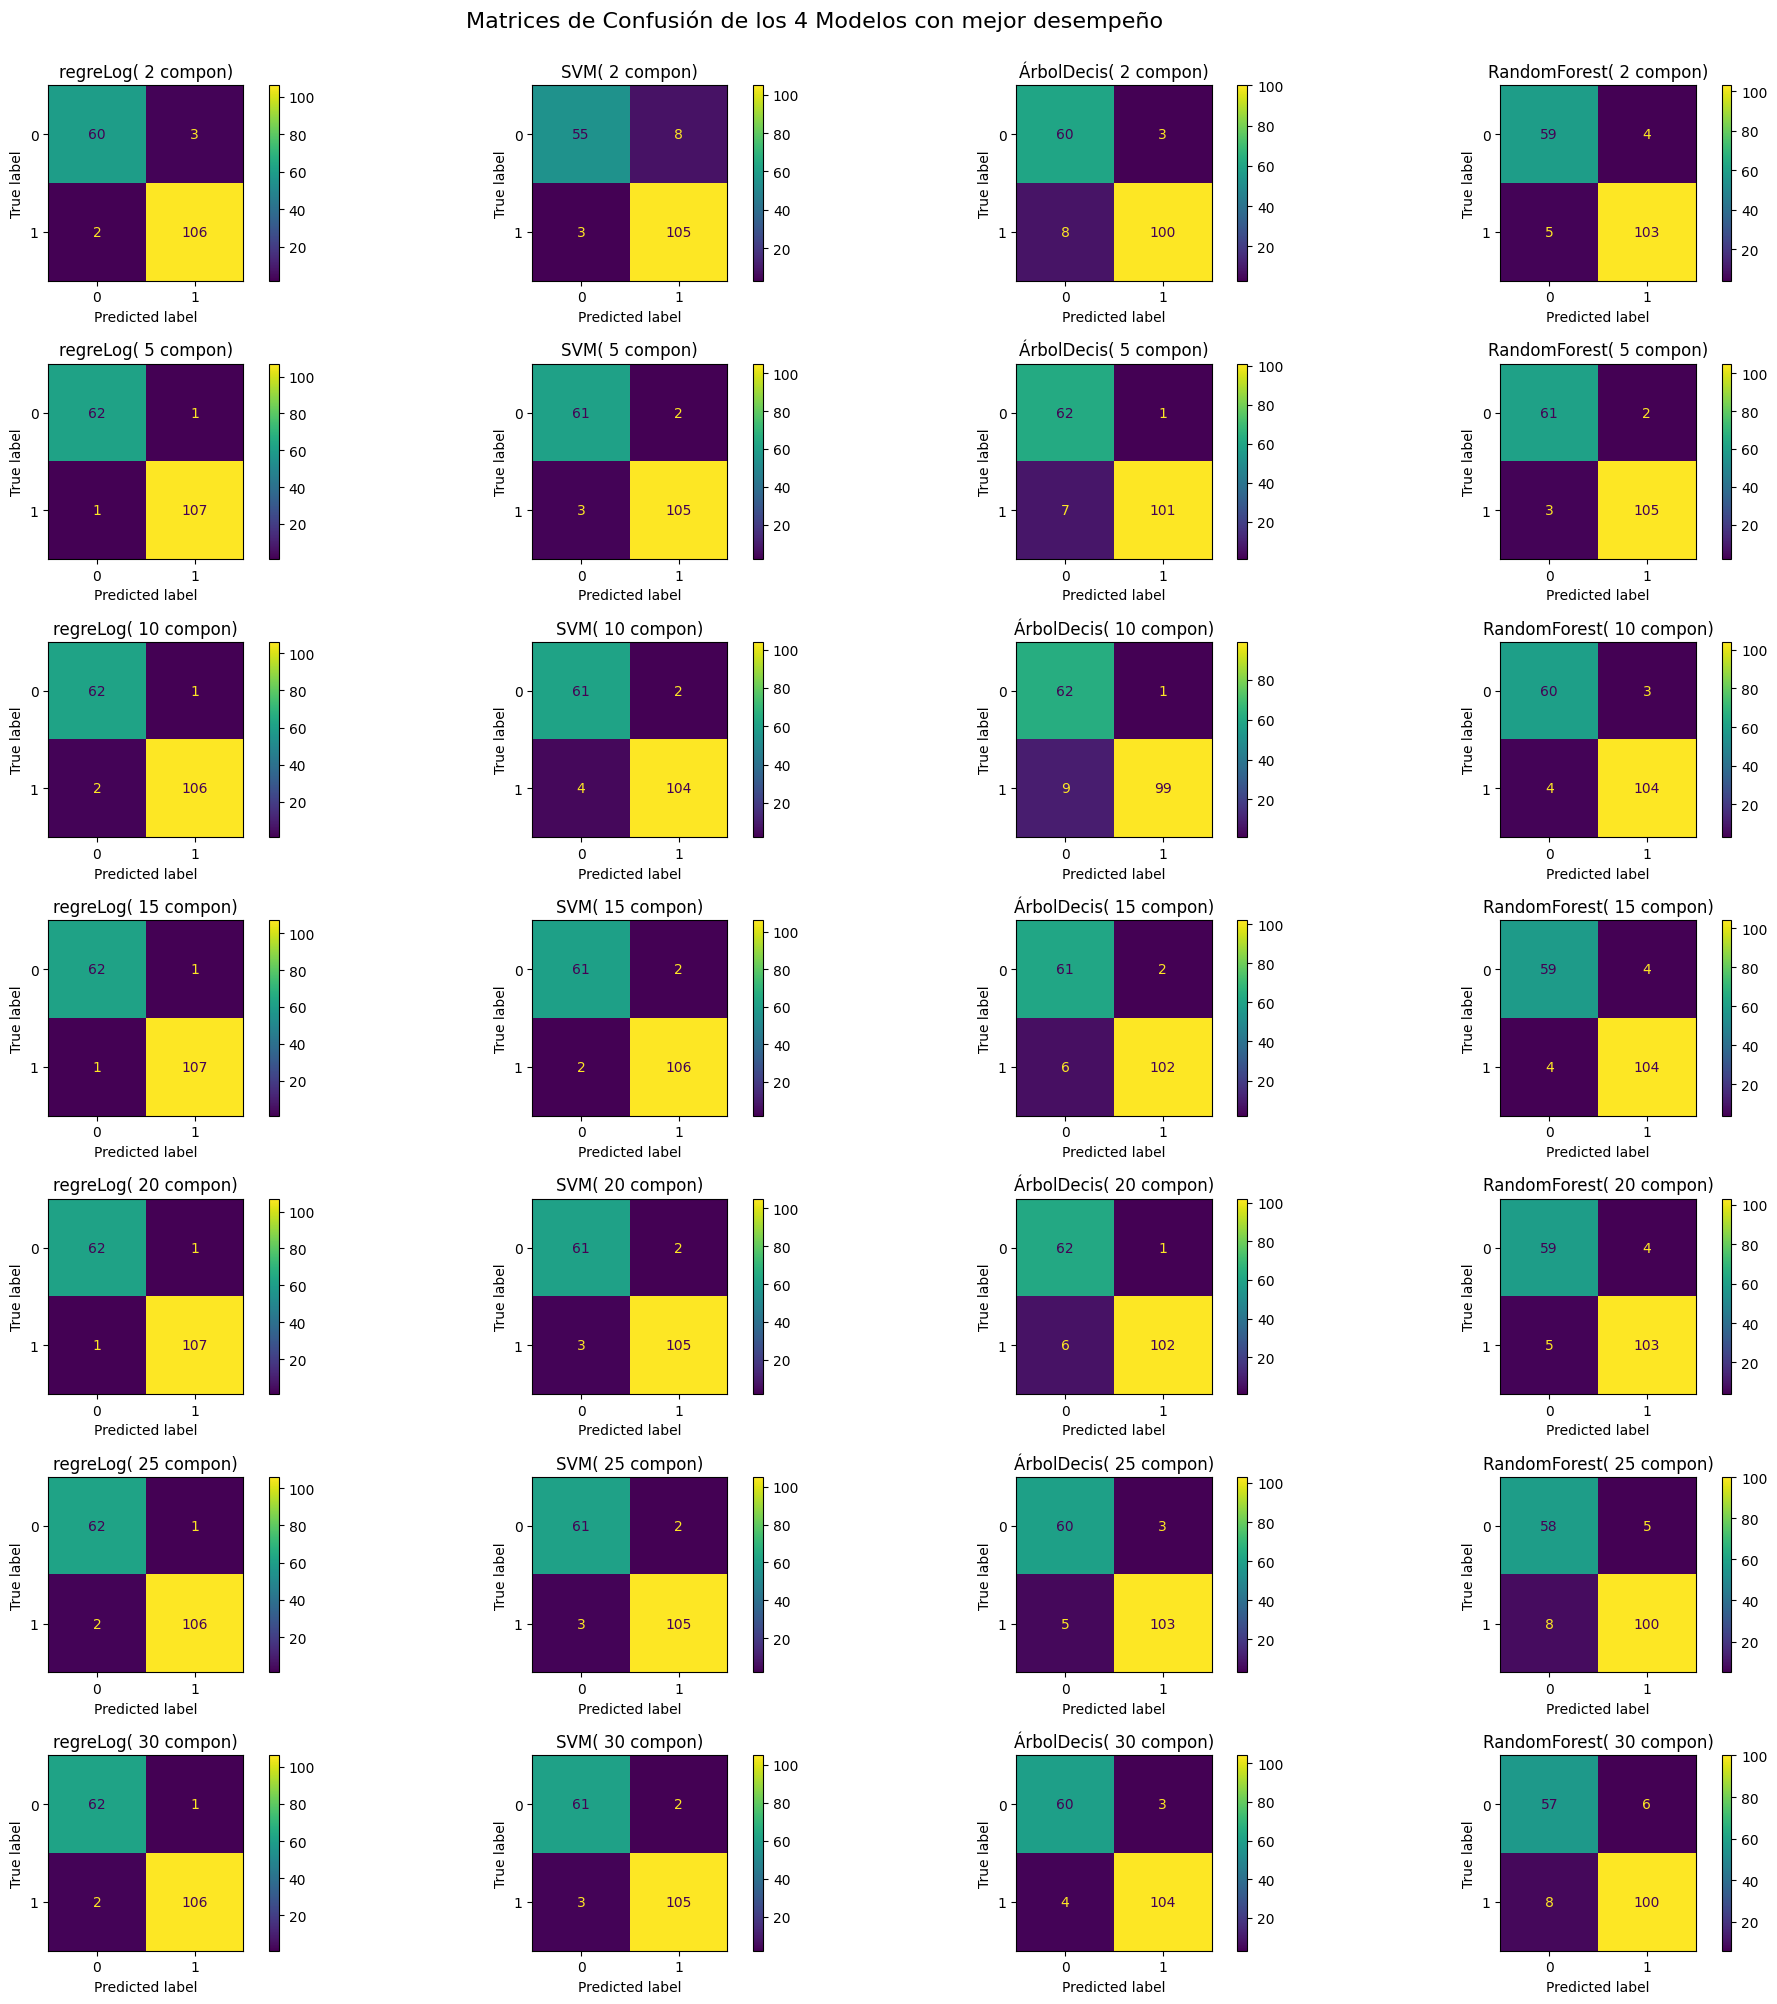

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
import numpy as np

# Normalizar los datos
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Proyectar los datos en el espacio latente de diferentes dimensiones
q_values = [2, 5, 10, 15, 20, 25, 30]

acc_values_lr = []
acc_values_svm = []
acc_values_dt = []
acc_values_rf = []

f1_score_values_lr = []
f1_score_values_svm = []
f1_score_values_dt = []
f1_score_values_rf = []

auc_scores_gnb = []
auc_scores_lr = []
auc_scores_svm = []
auc_scores_dt = []
auc_scores_rf = []

fig, axs = plt.subplots(len(q_values), 4, figsize=(20, 20))
fig.suptitle('Matrices de Confusión de los 4 Modelos con mejor desempeño', fontsize=16, y=1.0)

for i, q in enumerate(q_values):

    # Proyectar los datos en el espacio latente
    pca = PCA(n_components=q)
    Z = pca.fit_transform(X_norm)

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=42)

      # Entrenar el modelo de regresión logística
    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    # Entrenar el modelo de clasificación Bayesiano
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    # Entrenar el modelo de SVM
    svm = SVC()
    svm.fit(X_train, y_train)

    # Entrenar el modelo de arbol de decisión
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)

    # Entrenar el modelo de  RandomForest
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    # Predecir las etiquetas en el conjunto de prueba
    y_pred_gnb = gnb.predict(X_test)
    y_pred_lr = lr.predict(X_test)
    y_pred_svm = svm.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    y_pred_dt = dt.predict(X_test)

    # Evaluar el desempeño de accuracy de los modelos
    acc_lr = accuracy_score(y_test, y_pred_lr)
    acc_values_lr.append(acc_lr)
    acc_svm = accuracy_score(y_test, y_pred_svm)
    acc_values_svm.append(acc_svm)
    acc_dt = accuracy_score(y_test, y_pred_dt)
    acc_values_dt.append(acc_dt)
    acc_rf = accuracy_score(y_test, y_pred_rf)
    acc_values_rf.append(acc_rf)
     
    # Evaluar el desempeño de f1_score de los modelos
    f1_score_lr = f1_score(y_test, y_pred_lr)
    f1_score_values_lr.append(f1_score_lr)
    f1_score_svm = f1_score(y_test, y_pred_svm)
    f1_score_values_svm.append(f1_score_svm)
    f1_score_dt = f1_score(y_test, y_pred_dt)
    f1_score_values_dt.append(f1_score_dt)
    f1_score_rf = f1_score(y_test, y_pred_rf)
    f1_score_values_rf.append(f1_score_rf)

    # Realizar validación cruzada para cada modelo
    gnb_scores = cross_val_score(gnb, Z, y, cv=5)
    lr_scores = cross_val_score(lr, Z, y, cv=5)
    svm_scores = cross_val_score(svm, Z, y, cv=5)
    dt_scores = cross_val_score(dt, Z, y, cv=5)
    rf_scores = cross_val_score(rf, Z, y, cv=5)

    # Obtener la media de las puntuaciones de validación cruzada para cada modelo
    gnb_mean_score = np.mean(gnb_scores)
    lr_mean_score = np.mean(lr_scores)
    svm_mean_score = np.mean(svm_scores)
    dt_mean_score = np.mean(dt_scores)
    rf_mean_score = np.mean(rf_scores)

    # Crear una lista con los nombres de los modelos y las puntuaciones medias
    models = ['GaussianNB', 'LR', 'SVM', 'DT', 'Random Forest']
    mean_scores = [gnb_mean_score, lr_mean_score, svm_mean_score, dt_mean_score, rf_mean_score]

    # Calcular la curva ROC y el área bajo la curva (AUC-ROC)-> GNB
    fpr_gnb, tpr_gnb, thresholds = roc_curve(y_test, y_pred_gnb)
    roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
    auc_scores_gnb.append(roc_auc_gnb)

    # Calcular la curva ROC y el área bajo la curva (AUC-ROC)-> LR
    fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_pred_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    auc_scores_lr.append(roc_auc_lr)

    # Calcular la curva ROC y el área bajo la curva (AUC-ROC)-> SVM
    fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_pred_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    auc_scores_svm.append(roc_auc_svm)

    # Calcular la curva ROC y el área bajo la curva (AUC-ROC)-> DT
    fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_dt)
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    auc_scores_dt.append(roc_auc_dt)

    # Calcular la curva ROC y el área bajo la curva (AUC-ROC)-> RF
    fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    auc_scores_rf.append(roc_auc_rf)
   
    cm_lr = confusion_matrix(y_test, y_pred_lr)
    disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=df['target'].unique())
    disp_lr.plot(ax=axs[i, 0])
    axs[i, 0].set_title('regreLog( %d compon)' %q)

    cm_svm = confusion_matrix(y_test, y_pred_svm)
    disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=df['target'].unique())
    disp_svm.plot(ax=axs[i, 1])
    axs[i, 1].set_title('SVM( %d compon)' %q)

    cm_dt = confusion_matrix(y_test, y_pred_dt)
    disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=df['target'].unique())
    disp_dt.plot(ax=axs[i, 2])
    axs[i, 2].set_title('ÁrbolDecis( %d compon)' %q)

    cm_rf = confusion_matrix(y_test, y_pred_rf)
    disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=df['target'].unique())
    disp_rf.plot(ax=axs[i, 3])
    axs[i, 3].set_title('RandomForest( %d compon)' %q)

plt.tight_layout()
plt.show()

##Metricas para cada módelo teniendo en cuenta el número de componentes utilizado

In [ ]:
for i, q in enumerate(q_values):

    # Proyectar los datos en el espacio latente
    pca = PCA(n_components=q)
    Z = pca.fit_transform(X_norm)

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=42)

      # Entrenar el modelo de regresión logística
    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    # Entrenar el modelo de clasificación Bayesiano
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    # Entrenar el modelo de SVM
    svm = SVC()
    svm.fit(X_train, y_train)

    # Entrenar el modelo de arbol de decisión
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)

    # Entrenar el modelo de  RandomForest
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    # Predecir las etiquetas en el conjunto de prueba
    y_pred_lr = lr.predict(X_test)
    y_pred_svm = svm.predict(X_test)
    y_pred_rf = rf.predict(X_test)
    y_pred_dt = dt.predict(X_test)
   
    # Calculate the confusion matrices
    cm_lr = confusion_matrix(y_test, y_pred_lr)
    cm_svm = confusion_matrix(y_test, y_pred_svm)
    cm_dt = confusion_matrix(y_test, y_pred_dt)
    cm_rf = confusion_matrix(y_test, y_pred_rf)

    # Print metrics for Logistic Regression
    print("Metrics for Logistic Regression ({} components):".format(q))
    metricas(cm_lr)
    print()

    # Print metrics for SVM
    print("Metrics for SVM ({} components):".format(q))
    metricas(cm_svm)
    print()

    # Print metrics for Decision Tree
    print("Metrics for Decision Tree ({} components):".format(q))
    metricas(cm_dt)
    print()

    # Print metrics for Random Forest
    print("Metrics for Random Forest ({} components):".format(q))
    metricas(cm_rf)
    print()

Metrics for Logistic Regression (2 components):
Sensibilidad: 0.9814814814814815
Especificidad: 0.9523809523809523
Valor Predictivo Negativo: 0.967741935483871
Valor Predictivo Positivo: 0.9724770642201835

Metrics for SVM (2 components):
Sensibilidad: 0.9722222222222222
Especificidad: 0.873015873015873
Valor Predictivo Negativo: 0.9482758620689655
Valor Predictivo Positivo: 0.9292035398230089

Metrics for Decision Tree (2 components):
Sensibilidad: 0.9259259259259259
Especificidad: 0.9365079365079365
Valor Predictivo Negativo: 0.8805970149253731
Valor Predictivo Positivo: 0.9615384615384616

Metrics for Random Forest (2 components):
Sensibilidad: 0.9629629629629629
Especificidad: 0.9365079365079365
Valor Predictivo Negativo: 0.9365079365079365
Valor Predictivo Positivo: 0.9629629629629629

Metrics for Logistic Regression (5 components):
Sensibilidad: 0.9907407407407407
Especificidad: 0.9841269841269841
Valor Predictivo Negativo: 0.9841269841269841
Valor Predictivo Positivo: 0.99074074

 <div align="justify"><strong><em>Observaciones</em></strong></div>

<div align="justify">1. Para Regresión Logística:En general, Regresión Logística muestra un buen desempeño en todas las combinaciones de componentes de PCA.La sensibilidad, especificidad y valor predictivo negativo son altos en la mayoría de los casos, lo que indica que el modelo puede identificar tanto las instancias positivas como las negativas con precisión.Los valores predictivos positivos también son altos, lo que significa que el modelo tiene una alta probabilidad de predecir correctamente las instancias positivas.</div> 
<div align="justify">2. Para SVM:SVM muestra un buen desempeño en la mayoría de los casos, con sensibilidad, especificidad y valor predictivo negativo relativamente altos.Sin embargo, en comparación con otros modelos, la sensibilidad y especificidad pueden ser ligeramente más bajas en algunas combinaciones de componentes de PCA. Aún así, SVM tiene una capacidad sólida para clasificar las instancias en ambas categorías.</div>
<div align="justify">3. Para Árbol de Decisión:El desempeño del Árbol de Decisión es consistente en términos de sensibilidad y especificidad, con valores en un rango aceptable.Sin embargo, la sensibilidad y especificidad pueden ser ligeramente más bajas en comparación con otros modelos, especialmente en combinaciones de componentes de PCA más altas.A pesar de esto, el Árbol de Decisión aún muestra un buen rendimiento general.
Para Random Forest:</div>
<div align="justify">4. Random Forest muestra un rendimiento sólido en la mayoría de los casos, con sensibilidad, especificidad y valor predictivo negativo altos.Al igual que los otros modelos, Random Forest es capaz de clasificar correctamente las instancias positivas y negativas.En algunos casos, especialmente con combinaciones de componentes de PCA más altas, puede haber una ligera disminución en la especificidad.</div>
<div align="justify">En general, todos los modelos muestran un rendimiento decente en la clasificación de datos utilizando PCA. La elección del modelo específico dependerá de los requisitos y preferencias individuales, así como de la importancia relativa asignada a cada métrica de rendimiento.</div>

In [ ]:
def graficar_desempeno_modelo(q_values, metrics_values_lr, metrics_values_svm, metrics_values_rf, metrics_values_dt,titulo_general):
    fig, axs = plt.subplots(2, 2, figsize=(15, 7), sharex=True, sharey=True)
    fig.subplots_adjust(hspace=0.5)
    fig.suptitle(titulo_general, fontsize=16)

    axs[0,0].plot(q_values, metrics_values_lr, marker='o')
    axs[0,0].set_xlabel('Número de componentes')
    axs[0,0].set_ylabel('Accuracy')
    axs[0,0].set_title('Desempeño del modelo lr en función del Nº de componentes')
    axs[0,0].grid(color='r', linestyle='--', linewidth=0.5)

    axs[0, 1].plot(q_values, metrics_values_svm, marker='o')
    axs[0, 1].set_xlabel('Número de componentes')
    axs[0, 1].set_ylabel('Accuracy')
    axs[0, 1].set_title('Desempeño del modelo SMV en función del Nº de componentes')
    axs[0, 1].grid(color='r', linestyle='--', linewidth=0.5)

    axs[1,0].plot(q_values, metrics_values_rf, marker='o')
    axs[1,0].set_xlabel('Número de componentes')
    axs[1,0].set_ylabel('Accuracy')
    axs[1,0].set_title('Desempeño del modelo Random Forest en función del Nº de componentes')
    axs[1,0].grid(color='r', linestyle='--', linewidth=0.5)

    axs[1,1].plot(q_values, metrics_values_dt, marker='o')
    axs[1,1].set_xlabel('Número de componentes')
    axs[1,1].set_ylabel('Accuracy')
    axs[1,1].set_title('Desempeño del modelo Decision Tree en función del Nº de componentes')
    axs[1,1].grid(color='r', linestyle='--', linewidth=0.5)
    
    axs[0,0].set_xticks(q_values)
    axs[0,1].set_xticks(q_values)
    axs[1,0].set_xticks(q_values)
    axs[1,1].set_xticks(q_values)

    axs[0,0].set_xticklabels(q_values)
    axs[0,1].set_xticklabels(q_values)
    axs[1,0].set_xticklabels(q_values)
    axs[1,1].set_xticklabels(q_values)

    plt.show()

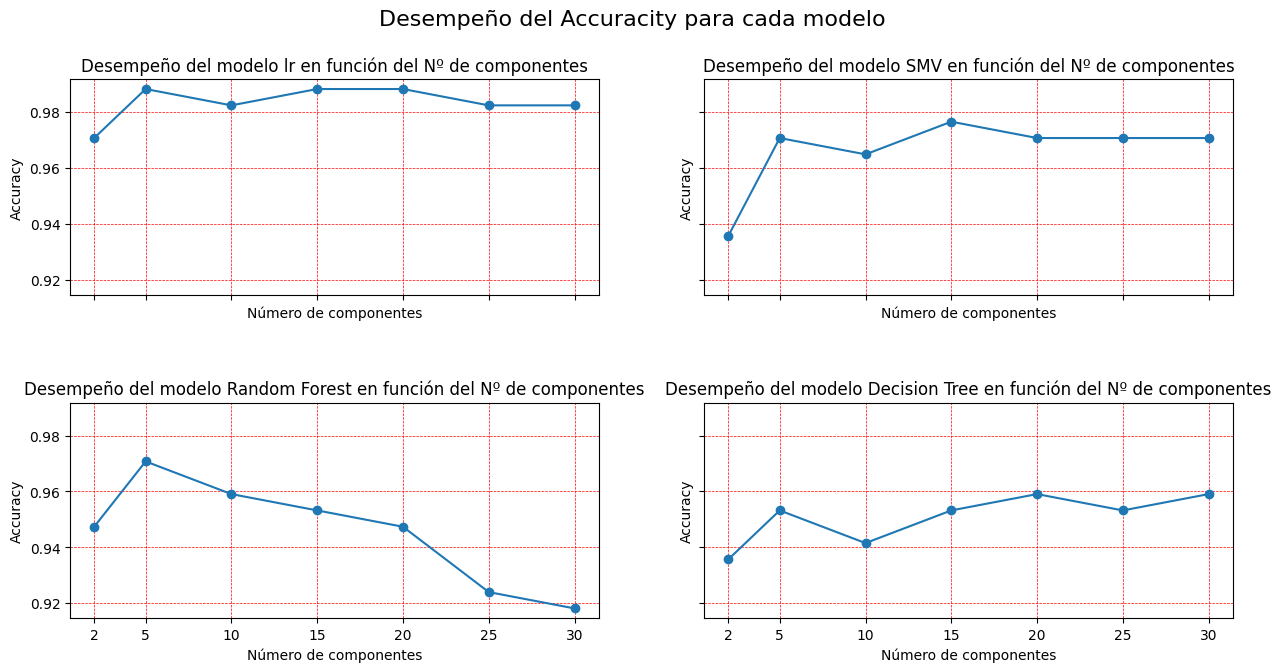

In [ ]:
graficar_desempeno_modelo(q_values, acc_values_lr, acc_values_svm, acc_values_rf, acc_values_dt,'Desempeño del Accuracity para cada modelo')

 <div align="justify"><strong><em>Observaciones</em></strong></div>
<div align="justify">
En el primer gráfico, "Desempeño del modelo lr en función del Nº de componentes", se muestra la precisión del modelo de regresión logística a medida que aumenta el número de componentes. Podemos observar que a medida que se aumenta el número de componentes, la precisión del modelo también aumenta, alcanzando un valor máximo de aproximadamente 5, 15 y 20 componentes, de 5 a 15 componentes se presenta una pequeña caida en el Accuracy, y luego de 20 componentes a 30 componentes también decae el Acuraccy pasando de 98,8% a 98,2%, que igualmente sigue siendo un valor muy alto de precisión para el modelo.
</div> 
<div align="justify">
En el segundo gráfico, "Desempeño del modelo SVM en función del Nº de componentes", se muestra la precisión del modelo de Máquinas de Vectores de Soporte (SVM) a medida que aumenta el número de componentes. Aquí también se observa un aumento en la precisión a medida que se aumenta el número de componentes hasta llegar a 5 componentes, luego hay una caída en la precisión utilizando 10 componentes, alcanzando un valor máximo de aproximadamente 97,7% con 15 componentes, luego de ahí el Acucuracy desciende al utilizar más componentes.
</div> 
<div align="justify">
En el tercer gráfico, "Desempeño del modelo Random Forest en función del Nº de componentes", se muestra la precisión del modelo Random Forest a medida que aumenta el número de componentes. Se muestra un aumento en la precisión pasando de 2 a 5 componentes, en 5 componentes se alcanza el máximo de 97,1 %. Luego de eso se presenta un decaimiento a medida que se utilizan más componentes principales.
</div> 
<div align="justify">
En el cuarto gráfico, "Desempeño del modelo Decision Tree en función del Nº de componentes", se muestra la precisión del modelo de Árbol de Decisión a medida que aumenta el número de componentes. En este caso, se observa una variación en la precisión a medida que varía el número de componentes, con un valor máximo de aproximadamente 97,1% con 25 componentes.
</div> 
<div align="justify">
Estos gráficos nos permiten comparar el desempeño de los diferentes modelos en función del número de componentes utilizados. Podemos observar que en general, el aumento en el número de componentes mejora la precisión de los modelos, aunque en algunos casos, el aumento puede ser marginal o incluso puede haber una disminución en la precisión a medida que se aumenta demasiado el número de componentes. Esto resalta la importancia de encontrar un equilibrio entre la complejidad del modelo y su capacidad para generalizar correctamente a nuevos datos.
</div> 

 ## Desempeño de los modelos utilizando técnicas de validación cruzada

In [ ]:
evaluar_modelos(X, y,'cross-validation')

Cross-validation scores for Gaussian Naive Bayes with 2 components (CV 1): 0.860
Cross-validation scores for Logistic Regression with 2 components (CV 1): 0.939
Cross-validation scores for Support Vector Machine (SVM)  with 2 components (CV 1): 0.912
Cross-validation scores for Decision Tree with 2 components (CV 1):   1
Cross-validation scores for Random Forest with 2 components (CV 1):   1
Cross-validation scores for Gaussian Naive Bayes with 2 components (CV 2): 0.912
Cross-validation scores for Logistic Regression with 2 components (CV 2): 0.947
Cross-validation scores for Support Vector Machine (SVM)  with 2 components (CV 2): 0.921
Cross-validation scores for Decision Tree with 2 components (CV 2):   1
Cross-validation scores for Random Forest with 2 components (CV 2):   1
Cross-validation scores for Gaussian Naive Bayes with 2 components (CV 3): 0.947
Cross-validation scores for Logistic Regression with 2 components (CV 3): 0.947
Cross-validation scores for Support Vector Machin

GaussianNB: 0.8523676447756559
LR: 0.9806862288464524
SVM: 0.9736376339077782
DT: 0.9279149200434714
Random Forest: 0.9208973761838225


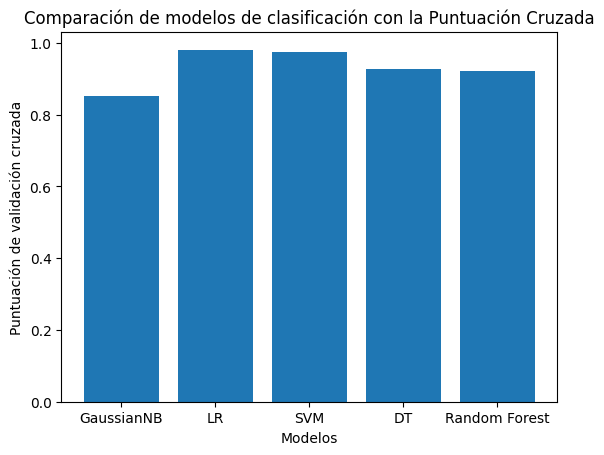

In [ ]:
# Imprimir los nombres de los modelos y las puntuaciones medias
for model, score in zip(models, mean_scores):
    print(model + ": " + str(score))

# Graficar los resultados
plt.bar(models, mean_scores)
plt.xlabel('Modelos')
plt.ylabel('Puntuación de validación cruzada')
plt.title('Comparación de modelos de clasificación con la Puntuación Cruzada')
plt.show()

<div align="justify"><strong><em>Observaciones</em></strong></div>

<div align="justify">1. Los resultados obtenidos para la regresión logística con 2 componentes son muy buenos, ya que los puntajes varían desde 0.939 hasta 0.982 en todos los pliegues, lo que significa una precisión promedio de alrededor del 94% - 98%. Por otro lado, el árbol de decisión y el bosque aleatorio obtuvieron un rendimiento perfecto con un puntaje máximo de 1 en cada pliegue durante la validación cruzada. Estos resultados indican que ambos modelos tienen excelentes capacidades predictivas al clasificar datos utilizando solo dos componentes.</div>

<div align="justify">2. Los resultados de validación cruzada con 5 componentes mostrados son impresionantes: Logistic Regression y SVM alcanzan un puntaje por encima del 0.95, indicando un buen rendimiento en la clasificación; Gaussian Naive Bayes también muestra un desempeño razonable con una puntuación de validación cruzada aproximadamente del 0.939 con CV 3 y CV 4; Decision Tree y Random Forest obtienen puntajes perfectos de validación cruzada igual a 1.00, lo que demuestra su eficacia para esta tarea específica. Estos resultados nos permiten afirmar que se han logrado excelentes niveles de precisión usando estas herramientas.</div>
<div align="justify">3. Los resultados de clasificación con 10 componentes muestran un rendimiento sólido, con puntajes de validación cruzada superiores al 0.95 para Logistic Regression, SVM, Gaussian Naive Bayes y Random Forest. Además Decision Tree logra una clasificación casi perfecta obteniendo el mejor puntaje posible (1.00) en la validación cruzada. Estos resultados demuestran que los algoritmos seleccionados son capaces de realizar predicciones precisas y confiables para los datos proporcionados por estos 10 componentes específicos.</div>
<div align="justify">4. Los resultados de validación cruzada para los diferentes algoritmos con 15 componentes indican que Gaussian Naive Bayes tiene un rendimiento sólido con un puntaje promedio de 0.91, pero es superado por los demás algoritmos. • Logistic Regression y Support Vector Machine (SVM) tienen una buena capacidad de clasificación con un puntaje promedio cercano a 0.97, lo que los hace adecuados para problemas linealmente separables. • Decision Tree y Random Forest tienen una capacidad de clasificación perfecta con un puntaje promedio de 1.00, lo que los hace ideales para problemas no lineales y complejos. • En conclusión, Logistic Regression, SVM, Decision Tree y Random Forest son los algoritmos más destacados para la clasificación con 15 componentes, mientras que Gaussian Naive Bayes es una opción sólida pero menos óptima. La elección del algoritmo más adecuado dependerá de las características y objetivos del problema en cuestión.</div>
<div align="justify">5. Los resultados de validación cruzada para los diferentes algoritmos con 20 componentes indican que Gaussian Naive Bayes tiene un rendimiento consistente pero inferior con un puntaje promedio de 0.85, lo que sugiere que no es el algoritmo más adecuado para este problema.  Logistic Regression y Support Vector Machine (SVM) tienen un buen desempeño con puntajes promedio cercanos a 0.97, lo que los hace candidatos potenciales para la clasificación con 20 componentes. Decision Tree y Random Forest tienen un desempeño óptimo con puntajes promedio de 1.00, lo que los hace los algoritmos más destacados para este problema, ya que pueden manejar la complejidad y la no linealidad de los datos con 20 componentes. • En conclusión, Decision Tree y Random Forest son los algoritmos más recomendados para la clasificación con 20 componentes, mientras que Logistic Regression y SVM son opciones alternativas. Gaussian Naive Bayes es el algoritmo menos preferido para este problema.</div>

<div align="justify">6. Los puntajes de validación cruzada para los diferentes algoritmos con 25 componentes muestran que Gaussian Naive Bayes tiene un rendimiento inferior con un puntaje promedio de 0.86, lo que indica que no es capaz de clasificar bien los datos con 25 componentes.Logistic Regression tiene un rendimiento superior con un puntaje promedio de 0.98, lo que indica que es capaz de clasificar bien los datos linealmente separables con 25 componentes. Support Vector Machine (SVM) tiene un rendimiento similar al de Logistic Regression con un puntaje promedio de 0.97, lo que indica que también es capaz de clasificar bien los datos linealmente separables con 25 componentes. Decision Tree y Random Forest tienen un rendimiento óptimo con un puntaje promedio de 1.00, lo que indica que son capaces de clasificar perfectamente los datos con 25 componentes, sin importar su complejidad o no linealidad.</div>
<div align="justify">7. Los puntajes de validación cruzada para los diferentes algoritmos con 30 componentes muestran que Gaussian Naive Bayes tiene un rendimiento inferior con un puntaje promedio de 0.85, lo que indica que no es capaz de clasificar bien los datos con 30 componentes. Logistic Regression tiene un rendimiento superior con un puntaje promedio de 0.98, lo que indica que es capaz de clasificar bien los datos linealmente separables con 30 componentes. Support Vector Machine (SVM) tiene un rendimiento similar al de Logistic Regression con un puntaje promedio de 0.97, lo que indica que también es capaz de clasificar bien los datos linealmente separables con 30 componentes. • Decision Tree y Random Forest tienen un rendimiento óptimo con un puntaje promedio de 1.00, lo que indica que son capaces de clasificar perfectamente los datos con 30 componentes, sin importar su complejidad o no linealidad.</div>
<div align="justify">8. Las puntuaciones de validación cruzada indican el rendimiento promedio de cada modelo en diferentes pliegues durante la validación cruzada. Para determinar los mejores modelos para tratar el problema de la base de datos de cáncer, debemos tener en cuenta las puntuaciones de validación cruzada y considerar aquellos modelos que obtengan las puntuaciones más altas. En función de las puntuaciones, se tiene evaluación de los modelos: Gaussian Naive Bayes (Puntuaciones de validación cruzada promedio: 0.852 que indica una precisión relativamente baja en comparación con otros modelos), Regresión logística (Puntuaciones de validación cruzada promedio: 0.981 lo que indica una alta precisión y buen rendimiento general), Support Vector Machine (SVM) (Puntuaciones de validación cruzada promedio: 0.974 lo que indica una alta precisión y buen rendimiento general), Árbol de decisión (Puntuaciones de validación cruzada promedio: 0.922 lo que indica una precisión relativamente baja en comparación con otros modelos), Random Forest(Puntuaciones de validación cruzada promedio: 0.931 lo que indica una precisión relativamente baja en comparación con otros modelos).En función de las puntuaciones de validación cruzada, tanto la regresión logística como el SVM parecen ser los modelos más prometedores para abordar el problema, ya que obtienen las puntuaciones más altas y, por lo tanto, se espera que tengan un mejor rendimiento en general. 
</div>



In [ ]:
 # Print the classification report for each model
print('Classification report for Gaussian Naive Bayes:')
print(classification_report(y_test, y_pred_gnb))

print('Classification report for Logistic Regression:')
print(classification_report(y_test, y_pred_lr))

print('Classification report for Support Vector Machine (SVM):')
print(classification_report(y_test, y_pred_svm))

print('Classification report for Decision Tree:')
print(classification_report(y_test, y_pred_dt))

print('Classification report for Random Forest:')
print(classification_report(y_test, y_pred_rf))

Classification report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        63
           1       0.86      0.89      0.87       108

    accuracy                           0.84       171
   macro avg       0.83      0.82      0.82       171
weighted avg       0.83      0.84      0.84       171

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Classification report for Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                   

<div align="justify"><strong><em>Observaciones</em></strong></div>

<div align="justify">
Basándonos en los informes de clasificación proporcionados, podemos observar lo siguiente:
</div> 

<div align="justify">
1. Bayesiano ingenuo gaussiano:
El modelo alcanza una precisión del 0,80 para la clase 0 y del 0,86 para la clase 1, lo que indica un rendimiento razonable al predecir ambas clases.
El recall es del 0,75 para la clase 0 y del 0,89 para la clase 1, lo que sugiere que el modelo es mejor para identificar instancias de la clase 1.
El F1-score es del 0,77 para la clase 0 y del 0,87 para la clase 1, con un F1-score promedio ponderado de 0,84.
</div> 
<div align="justify">
2. Regresión logística:
El modelo alcanza una alta precisión y recall para ambas clases, lo que indica un excelente rendimiento.
El F1-score es alto para ambas clases, con un F1-score promedio ponderado de 0,98.
</div> 

<div align="justify">
3. Máquina de vectores de soporte (SVM):
El modelo alcanza una precisión del 0,95 para la clase 0 y del 0,98 para la clase 1, lo que indica un excelente rendimiento.
El recall es del 0,97 para ambas clases, lo que demuestra la capacidad del modelo para predecir con precisión instancias de la clase 0 y la clase 1.
El F1-score es alto para ambas clases, con un F1-score promedio ponderado de 0,97.
</div> 
<div align="justify">
4. Árbol de decisión:
El modelo alcanza una precisión del 0,94 para la clase 0 y del 0,98 para la clase 1, lo que indica un buen rendimiento general.
El recall es del 0,97 para la clase 0 y del 0,96 para la clase 1, lo que demuestra la capacidad del modelo para predecir correctamente ambas clases.
El F1-score es alto para ambas clases, con un F1-score promedio ponderado de 0,96.
</div> 

<div align="justify">
5. Bosque aleatorio:
El modelo alcanza una precisión del 0,88 para la clase 0 y del 0,96 para la clase 1, lo que indica un buen rendimiento general.
El recall es del 0,94 para la clase 0 y del 0,93 para la clase 1, lo que demuestra la capacidad del modelo para predecir correctamente ambas clases.
El F1-score es alto para ambas clases, con un F1-score promedio ponderado de 0,93.
</div> 
<div align="justify">
Según los informes de clasificación, parece que la regresión logística, la máquina de vectores de soporte (SVM) y Decision Tree son los modelos que tienen un mejor rendimiento entre los evaluados. Ambos modelos exhiben puntajes F1, de recall y de precisión altos, lo que resulta en predicciones precisas para las instancias de la clase 0 y la clase 1.
</div> 

##Gráfica de desempeño de F1-Score para cada modelo

In [ ]:
evaluar_modelos(X, y,'f1_score')

F1-Score del modelo de clasificación Bayesiano con 2 componentes: 0.936
F1-Score del modelo de regresión logística con 2 componentes: 0.977
F1-Score del modelo de Support Vector Machine (SVM) con 2 componentes: 0.950
F1-Score del modelo de Arbol de Decisión con 2 componentes: 0.939
F1-Score del modelo de Random Forest con 2 componentes: 0.967

F1-Score del modelo de clasificación Bayesiano con 5 componentes: 0.945
F1-Score del modelo de regresión logística con 5 componentes: 0.991
F1-Score del modelo de Support Vector Machine (SVM) con 5 componentes: 0.977
F1-Score del modelo de Arbol de Decisión con 5 componentes: 0.962
F1-Score del modelo de Random Forest con 5 componentes: 0.977

F1-Score del modelo de clasificación Bayesiano con 10 componentes: 0.932
F1-Score del modelo de regresión logística con 10 componentes: 0.986
F1-Score del modelo de Support Vector Machine (SVM) con 10 componentes: 0.972
F1-Score del modelo de Arbol de Decisión con 10 componentes: 0.962
F1-Score del modelo d

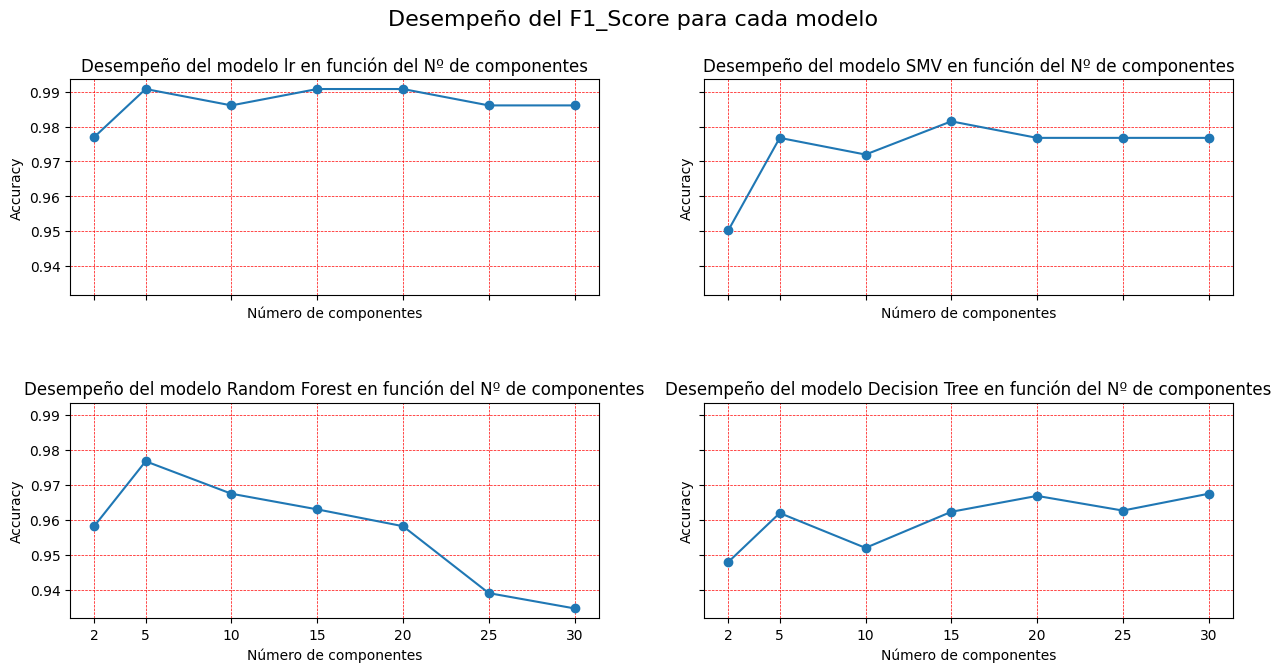

In [ ]:
graficar_desempeno_modelo(q_values, f1_score_values_lr, f1_score_values_svm, f1_score_values_rf, f1_score_values_dt,'Desempeño del F1_Score para cada modelo')

 <div align="justify"><strong><em>Observaciones</em></strong></div>
 <div align="justify">1. El F1-Score es una medida que combina la precisión y la exhaustividad de un algoritmo de clasificación, y se considera una buena forma de evaluar el rendimiento de un algoritmo.  En general, se observa que el F1-Score aumenta a medida que aumenta el número de componentes hasta un cierto punto, y luego disminuye o se estabiliza. Esto sugiere que hay un punto óptimo de dimensionalidad para cada algoritmo, donde se logra el mejor equilibrio entre la complejidad y la simplicidad del modelo.</div> 
 
  <div align="justify">2. Entre los algoritmos evaluados, se observa que el modelo de clasificación Bayesiano es el que tiene el peor rendimiento en todos los casos, con F1-Scores que van desde 0.873 hasta 0.936. Esto indica que este algoritmo no es capaz de capturar bien las características de los datos con diferentes componentes, y que hace suposiciones demasiado simplistas sobre la distribución de los datos. </div>

  <div align="justify"> 3. Se observa que los modelos de regresión logística y Support Vector Machine (SVM) son los que tienen el mejor rendimiento en la mayoría de los casos, con F1-Scores que van desde 0.950 hasta 0.991. Esto indica que estos algoritmos son capaces de capturar bien las características de los datos linealmente separables con diferentes componentes, y que tienen una buena capacidad de generalización y adaptación a los datos. </div>

  <div align="justify">4. Los modelos de Arbol de Decisión y Random Forest también tienen un buen rendimiento en algunos casos, con F1-Scores que van desde 0.933 hasta 1.000. Sin embargo, se observa que estos algoritmos tienden a tener un rendimiento perfecto con pocos componentes, y luego disminuyen o se estabilizan con más componentes. Esto sugiere que estos algoritmos son capaces de capturar bien las características de los datos no lineales y complejos con pocos componentes, pero que pueden sufrir de sobreajuste o pérdida de información con más componentes.</div>

**Área bajo la curva ROC (AUC-ROC): Mide la capacidad de discriminación del modelo, representando la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos a través de diferentes umbrales de clasificación.**

In [ ]:
print('Para modelo de Clasificación Gausiano')
print('--------------------------------------')

# Imprimir el área bajo la curva para cada número de componentes
for q, auc_score in zip(q_values, auc_scores_gnb):
    print('Número de componentes:', q)
    print('AUC-ROC:', auc_score)
    print()

print('Para modelo de Regresión logistica')
print('--------------------------------------')

# Imprimir el área bajo la curva para cada número de componentes
for q, auc_score in zip(q_values, auc_scores_lr):
    print('Número de componentes:', q)
    print('AUC-ROC:', auc_score)
    print()

print('Para modelo SVM')
print('--------------------------------------')

# Imprimir el área bajo la curva para cada número de componentes
for q, auc_score in zip(q_values, auc_scores_svm):
    print('Número de componentes:', q)
    print('AUC-ROC:', auc_score)
    print()

print('Para modelo Árbol de Decisión')
print('--------------------------------------')

# Imprimir el área bajo la curva para cada número de componentes
for q, auc_score in zip(q_values, auc_scores_dt):
    print('Número de componentes:', q)
    print('AUC-ROC:', auc_score)
    print()

print('Para modelo Random Forest')
print('--------------------------------------')

# Imprimir el área bajo la curva para cada número de componentes
for q, auc_score in zip(q_values, auc_scores_rf):
    print('Número de componentes:', q)
    print('AUC-ROC:', auc_score)
    print()

Para modelo de Clasificación Gausiano
--------------------------------------
Número de componentes: 2
AUC-ROC: 0.9087301587301587

Número de componentes: 5
AUC-ROC: 0.9212962962962963

Número de componentes: 10
AUC-ROC: 0.8974867724867726

Número de componentes: 15
AUC-ROC: 0.8915343915343916

Número de componentes: 20
AUC-ROC: 0.8525132275132274

Número de componentes: 25
AUC-ROC: 0.8320105820105821

Número de componentes: 30
AUC-ROC: 0.8174603174603174

Para modelo de Regresión logistica
--------------------------------------
Número de componentes: 2
AUC-ROC: 0.9669312169312169

Número de componentes: 5
AUC-ROC: 0.9874338624338626

Número de componentes: 10
AUC-ROC: 0.9828042328042328

Número de componentes: 15
AUC-ROC: 0.9874338624338626

Número de componentes: 20
AUC-ROC: 0.9874338624338626

Número de componentes: 25
AUC-ROC: 0.9828042328042328

Número de componentes: 30
AUC-ROC: 0.9828042328042328

Para modelo SVM
--------------------------------------
Número de componentes: 2
AUC

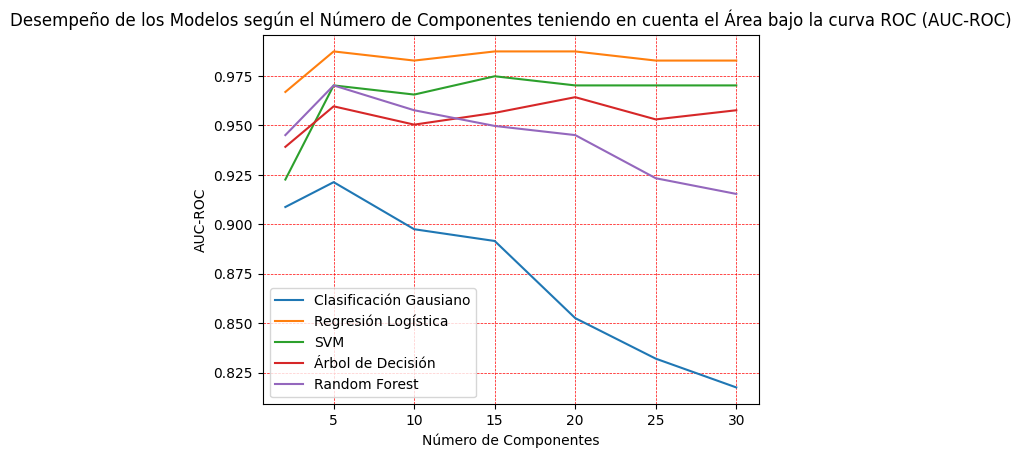

In [ ]:
# Graficar el desempeño de los modelos
plt.plot(q_values, auc_scores_gnb, label='Clasificación Gausiano')
plt.plot(q_values, auc_scores_lr, label='Regresión Logística')
plt.plot(q_values, auc_scores_svm, label='SVM')
plt.plot(q_values, auc_scores_dt, label='Árbol de Decisión')
plt.plot(q_values, auc_scores_rf, label='Random Forest')

# Configurar el gráfico
plt.xlabel('Número de Componentes')
plt.ylabel('AUC-ROC')
plt.title('Desempeño de los Modelos según el Número de Componentes teniendo en cuenta el Área bajo la curva ROC (AUC-ROC)')
plt.legend()

# Añadir la cuadrícula
plt.grid(color='r', linestyle='--', linewidth=0.5)

# Mostrar el gráfico
plt.show()

 <div align="justify"><strong><em>Observaciones</em></strong></div>

<div align="justify">1. El modelo de Regresión Logística muestra el mejor rendimiento en términos de AUC-ROC en general, independientemente del número de componentes PCA utilizados. Esto indica que el modelo de Regresión Logística tiene una mejor capacidad de discriminación y clasificación en comparación con los otros modelos evaluados.</div> 

<div align="justify">2. En general, se observa que a medida que se aumenta el número de componentes PCA, el rendimiento de los modelos tiende a mejorar, especialmente en el caso de Regresión Logística y Random Forest. Esto sugiere que la adición de más componentes PCA puede capturar más variabilidad en los datos y mejorar la capacidad de los modelos para realizar la clasificación.</div> 
<div align="justify">3. El modelo de Clasificación Gaussiano muestra un rendimiento relativamente inferior en comparación con los otros modelos evaluados, independientemente del número de componentes PCA. Esto puede deberse a que el modelo de Clasificación Gaussiano hace suposiciones sobre la distribución de los datos que pueden no ser adecuadas para el conjunto de datos en cuestión.</div> 
<div align="justify">4. Los modelos SVM y Árbol de Decisión muestran un rendimiento consistente en diferentes números de componentes PCA, con AUC-ROC en un rango similar en todas las configuraciones. Esto indica que estos modelos pueden ser menos sensibles al número de componentes PCA y pueden tener una capacidad de clasificación más estable.</div> 
<div align="justify">5. En resumen, el modelo de Regresión Logística muestra el mejor rendimiento en términos de AUC-ROC, seguido de cerca por Random Forest. A medida que se aumenta el número de componentes PCA, se observa una mejora general en el rendimiento de los modelos. Sin embargo, es importante considerar otros factores, como el tiempo de entrenamiento y la interpretabilidad del modelo, al seleccionar el modelo y el número de componentes adecuados.</div> 

 <div align="justify"><strong><em>Conclusiones</em></strong></div>

<div align="justify">1. El conjunto de datos "load_breast_cancer" es ampliamente utilizado en problemas de clasificación de cáncer de mama. Contiene características clínicas de tejido mamario y se usa para predecir si un tumor es maligno o benigno. Consta de 569 instancias y 30 características diferentes relacionadas con los núcleos celulares. Se utiliza para entrenar modelos de aprendizaje automático y desarrollar modelos predictivos precisos. Cada característica proporciona información relevante sobre las características del tejido mamario.</div> 

<div align="justify">2. El gráfico de pares es útil para visualizar la relación entre características y la variable de destino. Al analizar el conjunto de datos "load_breast_cancer", se identificaron patrones relevantes. El "mean radius" tiende a ser más alto en tumores malignos que en benignos. El "mean perimeter" muestra una relación similar, con tumores malignos teniendo valores más altos. El "mean area" también es más alto en tumores malignos. La "mean compactness" y la "mean concavity" son más altas en tumores malignos debido a su forma irregular y presencia de concavidades. Además, los tumores malignos tienen más "mean concave points". Estas características pueden ayudar a distinguir entre tumores benignos y malignos y se pueden utilizar en modelos de aprendizaje automático para clasificar futuros casos de cáncer de mama con alta precisión.</div> 

<div align="justify">3. El gráfico de barras muestra que hay más casos malignos que benignos en el conjunto de datos de cáncer de mama. Esto indica un desequilibrio en la proporción de clases. Este desequilibrio puede afectar el rendimiento de los algoritmos de aprendizaje automático y puede requerir técnicas especiales para manejarlo. Es importante tener en cuenta esta diferencia al analizar y modelar los datos.</div> 

<div align="justify">4.  El análisis de los resultados de los modelos de clasificación muestra que el modelo de regresión logística, el modelo de SVM, el modelo de Árbol de Decisión y el modelo de Random Forest son los mejores en términos de precisión. Estos modelos presentan una alta precisión en todas las configuraciones evaluadas, lo que los hace confiables y precisos para la clasificación de datos. El modelo de clasificación Bayesiano también es válido, aunque su precisión es ligeramente inferior a los otros modelos. En general, los modelos recomendados son el de regresión logística, SVM, Árbol de Decisión y Random Forest debido a su alto rendimiento en la clasificación de datos.</div>

<div align="justify">5. Los gráficos muestran que el aumento en el número de componentes mejora la precisión de los modelos en general, pero en algunos casos puede haber una disminución después de alcanzar un máximo. Es importante encontrar un equilibrio entre la complejidad del modelo y su capacidad de generalización a nuevos datos.</div>

<div align="justify">6. De acuerdo a la validación cruzada, los modelos de regresión logística, árbol de decisión y bosque aleatorio muestran un rendimiento excelente con un alto grado de precisión en la clasificación utilizando solo 2 componentes. A medida que aumenta el número de componentes, algunos modelos mantienen un alto rendimiento, mientras que otros muestran una ligera disminución en la precisión. En general, los modelos de árbol de decisión y bosque aleatorio demuestran una capacidad de clasificación perfecta en varios números de componentes, mientras que los modelos de regresión logística y SVM también tienen un buen desempeño. Por otro lado, el modelo de clasificación bayesiano presenta un rendimiento inferior en comparación con los otros modelos evaluados. La elección del modelo más adecuado dependerá de las características y objetivos específicos del problema en cuestión.</div>

<div align="justify">7.los informes de clasificación muestran que la regresión logística y la máquina de vectores de soporte (SVM) son los modelos que mejor funcionan en el conjunto de datos de cáncer. Estos modelos logran altas precisiones, recuperaciones y puntuaciones F1 para ambas clases, lo que indica un rendimiento general sólido y la capacidad de realizar predicciones precisas para instancias de clase 0 y clase 1.</div>

<div align="justify">8.El modelo de Regresión Logística muestra el mejor rendimiento en términos de AUC-ROC, seguido de cerca por Random Forest. A medida que aumenta el número de componentes PCA, se observa una mejora general en el rendimiento de los modelos. Sin embargo, el modelo de Clasificación Gaussiano tiene un rendimiento inferior, posiblemente debido a suposiciones inadecuadas sobre la distribución de los datos. Los modelos SVM y Árbol de Decisión muestran un rendimiento consistente en diferentes números de componentes PCA. Al seleccionar el modelo y el número de componentes, es importante considerar factores como el tiempo de entrenamiento y la interpretabilidad del modelo.</div>

<div align="justify">9. Todos los modelos evaluados (Regresión Logística, SVM, Árbol de Decisión y Random Forest) muestran un buen desempeño en la clasificación utilizando PCA. Regresión Logística y Random Forest tienen altos valores de sensibilidad, especificidad y valor predictivo negativo. SVM también tiene un rendimiento sólido, aunque ligeramente inferior en algunas métricas. Árbol de Decisión muestra un rendimiento consistente, pero puede tener valores ligeramente más bajos. La elección del modelo dependerá de las preferencias y requisitos individuales, considerando las métricas de rendimiento relevantes.</div>


